`IMPORTING LIBRARRIES`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

`IMPORT DATASET`

In [3]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [19]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

`CREATING DATASET`

In [13]:
dataset = pd.DataFrame(california.data,columns=california.feature_names)

In [18]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


`VISUALIZATION CORRELATION BETWEEN THE FEATURES`

In [20]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:>

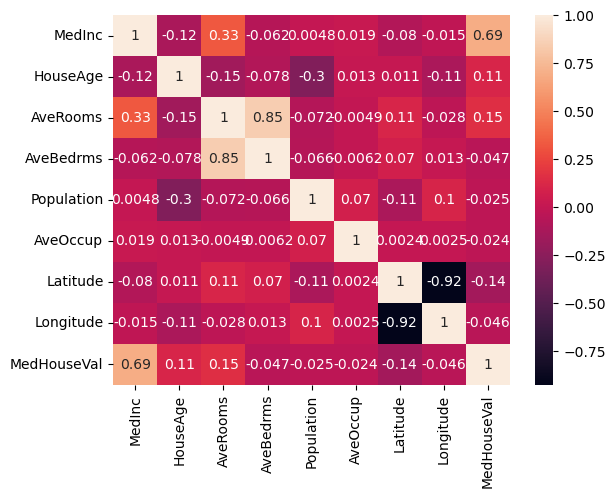

In [21]:
sns.heatmap(dataset.corr(),annot=True)

`DIVIDE THE DATASET INTO INDEPENDENT AND DEPENDENT SETS`

In [22]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
X,y

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude  
 0    

`DIVIDE THE DATSET INTO TRAIN AND TEST SETS`

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
X_train,X_test,y_train,y_test

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 5088   0.9809      19.0  3.187726   1.129964       726.0  2.620939     33.98   
 17096  4.2232      33.0  6.189696   1.086651      1015.0  2.377049     37.46   
 5617   3.5488      42.0  4.821577   1.095436      1044.0  4.331950     33.79   
 20060  1.6469      24.0  4.274194   1.048387      1686.0  4.532258     35.87   
 895    3.9909      14.0  4.608303   1.089350      2738.0  2.471119     37.54   
 ...       ...       ...       ...        ...         ...       ...       ...   
 11284  6.3700      35.0  6.129032   0.926267       658.0  3.032258     33.78   
 11964  3.0500      33.0  6.868597   1.269488      1753.0  3.904232     34.02   
 5390   2.9344      36.0  3.986717   1.079696      1756.0  3.332068     34.03   
 860    5.7192      15.0  6.395349   1.067979      1777.0  3.178891     37.58   
 15795  2.5755      52.0  3.402576   1.058776      2619.0  2.108696     37.77   
 
        Longitude  
 5088 

In [29]:
X_train.shape,y_train.shape

((13828, 8), (13828,))

`STANDARDIZING THE INDEPENDENT FEATURES`

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_train,X_test

(array([[-1.52169954, -0.75868455, -0.91813082, ..., -0.04014979,
         -0.78315293,  0.65090402],
        [ 0.18205382,  0.3523991 ,  0.30748451, ..., -0.05943619,
          0.8475975 , -1.31911678],
        [-0.17232772,  1.06666717, -0.25107784, ...,  0.09515433,
         -0.87218816,  0.66087881],
        ...,
        [-0.49518065,  0.59048846, -0.59192622, ...,  0.01608523,
         -0.75972261,  0.60103008],
        [ 0.96816708, -1.07613702,  0.39144665, ...,  0.0039722 ,
          0.90383028, -1.18445713],
        [-0.68377427,  1.86029835, -0.83041358, ..., -0.08065717,
          0.9928655 , -1.41387727]]),
 array([[-1.15370815, -0.28250584, -0.50803348, ...,  0.05921216,
          0.19154848,  0.28682423],
        [-0.70700034,  0.11430975, -0.16215378, ..., -0.03549556,
         -0.23956945,  0.06239148],
        [-0.20842797,  1.86029835, -0.59583032, ..., -0.13983657,
          1.0069237 , -1.42385206],
        ...,
        [-0.02167353, -1.07613702,  0.40141018, ...,  

`MODEL TRAINING`

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [35]:
slopes  = regressor.coef_
intercept = regressor.intercept_
print(f'Slopes :{slopes}')
print(f'Intercept :{intercept}')

Slopes :[ 8.46603472e-01  1.20333548e-01 -2.98800785e-01  3.47243173e-01
 -8.81413334e-05 -4.17242067e-02 -8.94420371e-01 -8.70401317e-01]
Intercept :2.0666362048018536


`PREDICTING THE TEST DATA`

In [37]:
y_pred = regressor.predict(X_test)
y_pred

array([0.72563462, 1.76650223, 2.70545812, ..., 1.25803135, 1.66673014,
       2.25826279])

`PERFORMANCE METRICS`

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

In [40]:
residual = y_test - y_pred
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r_squared = r2_score(y_test,y_pred)
print(mae,mse,rmse,r_squared)

0.5295710106684453 0.5369686543372459 0.7327814505957735 0.5970494128783952


<strong>CHECKING TWO ASSUMPTONS</strong>

`NORMALITY` 

C:\Users\gumma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MedHouseVal', ylabel='Density'>

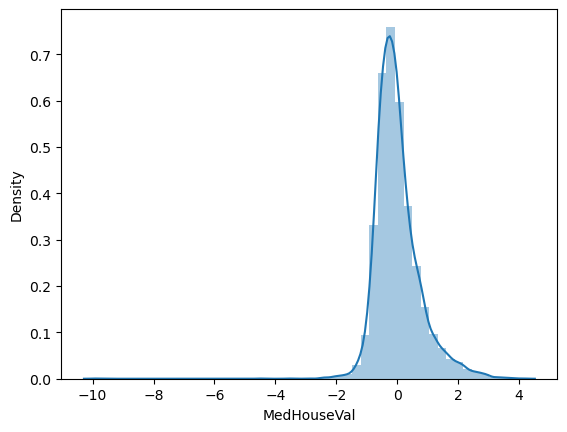

In [42]:
sns.distplot(residual)

`HOMOSCADASTICITY`

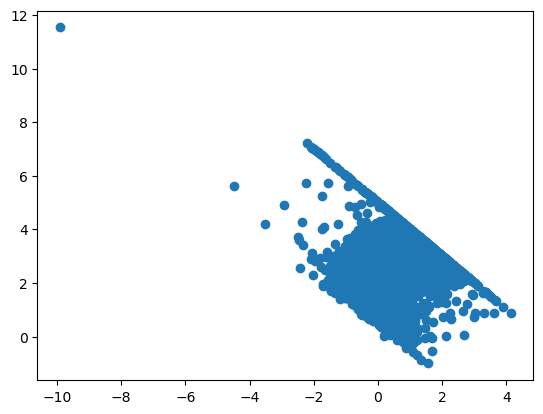

In [43]:
plt.scatter(residual,y_pred)